In [48]:
import pandas as pd
df = pd.read_csv(r'/Churn_Modelling.csv')
df.shape

(10000, 14)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [50]:
df.duplicated().sum()

0

In [51]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [53]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [54]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [66]:
df1 = df.drop(columns = ['RowNumber','CustomerId','Surname'])
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
599,484,Germany,Female,34,4,148249.54,1,0,1,33738.27,0
1520,723,Germany,Male,52,5,131694.97,1,0,1,92873.50,1
9250,713,Spain,Male,42,0,109121.71,1,0,1,167873.49,0
5112,536,Spain,Female,28,4,0.00,1,1,1,136197.65,0


In [67]:
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [68]:
x = df1.iloc[:,:-1] #independent variables
y = df1.iloc[:,-1]  # dependent variables

In [69]:
# create dummy variables
geography = pd.get_dummies(x['Geography'], drop_first = True,dtype =int)
gender = pd.get_dummies(x['Gender'], drop_first = True,dtype =int)
# Convert categorical variable into dummy/indicator variables.
#Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value;
#if the input is a DataFrame, the name of the original variable is prepended to the value.
# drop_first by default false.. True meansWhether to get k-1 dummies out of k categorical levels by removing the first level.

In [70]:
# concatenate the dataframes
x = pd.concat([x,geography,gender],axis = 1)

In [71]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [72]:
# Drop Unnecessary columns
x = x.drop(['Geography','Gender'],axis = 1)

In [73]:
x.sample(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
4666,850,39,5,114491.82,1,1,0,99689.48,1,0,0


In [74]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [75]:
x_train.shape

(8000, 11)

In [76]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [77]:
# Now Let's make the ANN

In [79]:
# Importing the keras libraries and packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [89]:
model = Sequential()  # empty neural network

# Adding the input layer and first hidden layer
model.add(Dense(units = 6,kernel_initializer = 'he_normal', activation ='relu', input_dim = 11))

#Adding the 2nd hidden layer
model.add(Dense(units = 6,kernel_initializer = 'he_normal', activation ='relu'))

# Adding the output layer
model.add(Dense(units =1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))



In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
# Compiling the ANN
model.compile(loss = 'binary_crossentropy', optimizer ='Adam', metrics = ['accuracy'])

In [92]:
# Fitting the ANN to the training set
hist_ = model.fit( x_train_scale , y_train, epochs = 100, validation_split = 0.2,batch_size = 10)

Epoch 1/100
640/640 [==============================] - 3s 4ms/step - loss: 0.4978 - accuracy: 0.7934 - val_loss: 0.4613 - val_accuracy: 0.7987
Epoch 2/100
640/640 [==============================] - 1s 2ms/step - loss: 0.4630 - accuracy: 0.7934 - val_loss: 0.4452 - val_accuracy: 0.7987
Epoch 3/100
640/640 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.7934 - val_loss: 0.4367 - val_accuracy: 0.7987
Epoch 4/100
640/640 [==============================] - 1s 2ms/step - loss: 0.4441 - accuracy: 0.7934 - val_loss: 0.4309 - val_accuracy: 0.7987
Epoch 5/100
640/640 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.7936 - val_loss: 0.4283 - val_accuracy: 0.7987
Epoch 6/100
640/640 [==============================] - 2s 2ms/step - loss: 0.4363 - accuracy: 0.7934 - val_loss: 0.4259 - val_accuracy: 0.7994
Epoch 7/100
640/640 [==============================] - 2s 2ms/step - loss: 0.4329 - accuracy: 0.7942 - val_loss: 0.4226 - val_accuracy: 0.8006

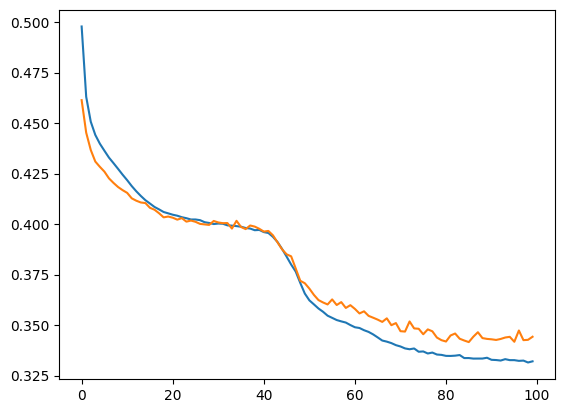

In [93]:
import matplotlib.pyplot as plt
plt.plot(hist_.history['loss'])
plt.plot(hist_.history['val_loss'])

plt.show()

In [94]:
# Making the Predictions and evaluating the model

# Predicting the Test Set Results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)


63/63 [==============================] - 0s 1ms/step


In [95]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [96]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8035